# Prosper's Loan Data
##### by Lucas Aledi

## Introduction 
## Prosper: advancing financial well-being
[Prosper](https://www.prosper.com) was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $18 billion in loans to more than 1,060,000 people.

For this presentation, we are going to walk through and analyze a dataset containing 113,937 loans with 81 variables on each loan. The original dataset provided in-depth information such as loan amount, borrower's APR and interest-rate, as well as Prosper's rating, current loan status, borrower income, and many others.

We are going to focus on the following topics:
* 1\. Prospering over the years
* 2\. Loan size, Instalments and Terms
* 3\. Dangerous combination

In [54]:
## import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## read data into a pandas DataFrame
df = pd.read_csv('ProsperData_clean.csv')
## back to the future
df.ListingCreationDate= pd.to_datetime(df.ListingCreationDate)

## 1. Prospering over the years
Prosper has had an accelerating growth year-on-year (except for a slowdown in 2012). However, with the available data, we still don't know how well Prosper is doing in comparison to its competitors.

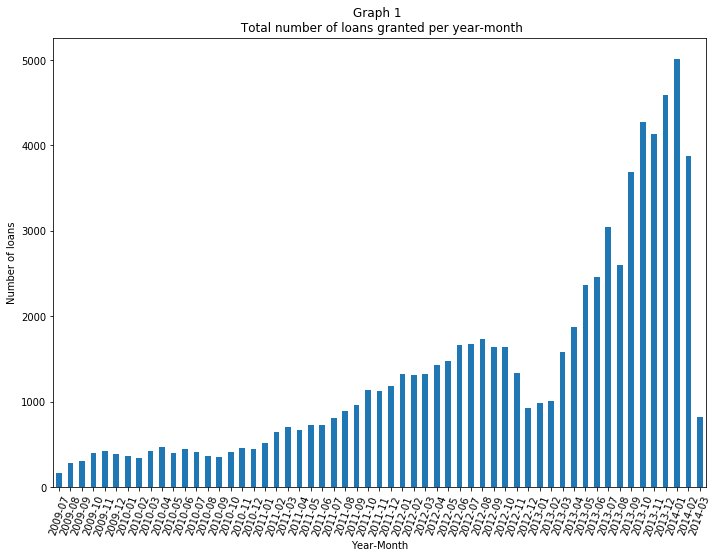

In [55]:
## plot listings per year-month
per = df.ListingCreationDate.dt.to_period("M")
g= df.groupby(per)['ListingNumber'].nunique()
plt.figure(figsize=[11.69, 8.27])
g.plot(kind='bar')
plt.title('Graph 1 \n Total number of loans granted per year-month')
plt.xlabel('Year-Month')
plt.ylabel('Number of loans')
plt.xticks(rotation=70)
plt.show()

Graph 1 shows a steady increase over the years on the number of loans issued by Prosper.

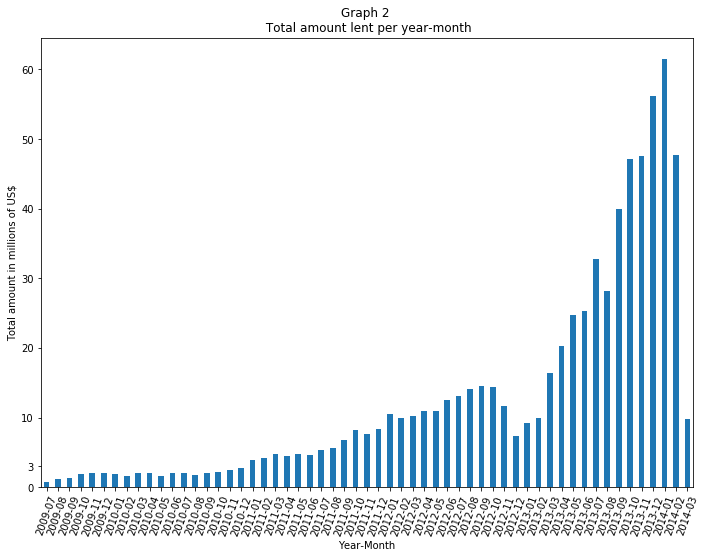

In [56]:
## total amount lent per year-month
per = df.ListingCreationDate.dt.to_period("M")
g= df.groupby(per)['LoanOriginalAmount'].sum()
plt.figure(figsize=[11.69, 8.27])
g.plot(kind='bar')
tick_props = [0, 3e6, 1e7, 2e7, 3e7, 4e7, 5e7, 6e7]
tick_names = [0, 3, 10, 20, 30, 40, 50, 60]
plt.yticks(tick_props, tick_names)
plt.title('Graph 2 \n Total amount lent per year-month')
plt.xlabel('Year-Month')
plt.ylabel('Total amount in millions of US$')
plt.xticks(rotation=70)
plt.show()

Similarly, graph 2 shows a steady increase over the years on the sum of loans issued by Prosper.

## 2. Loan size, Instalments and Terms
Not surprisingly, on average, the larger the loan amount, larger the monthly payment. Those, on their turn, tend to coalesce into 3 clearly distinct groups, driven by the loan term.

In [57]:
## This will be used latter on in the explanation
## Selecting 3 most common loan amount
query= "LoanOriginalAmount >= 4000 and LoanOriginalAmount < 4500 or LoanOriginalAmount >= 10000 and LoanOriginalAmount < 10500 or LoanOriginalAmount >= 15000 and LoanOriginalAmount < 15500"
df1= df.query(query)
## function to create new column
def selecter(row):
    if 4000 >= row < 4500:
        return '4k'
    elif 10000 >= row < 10500:
        return '10k'
    else:
        return '15k'
## new column
df1['CommonLoanAmount']= df1.LoanOriginalAmount.apply(selecter)

## ordered categorical type
amount= ['4k', '10k', '15k']
cat_amount= pd.api.types.CategoricalDtype(ordered= True, categories= amount)
df1['CommonLoanAmount']= df1['CommonLoanAmount'].astype(cat_amount)

/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


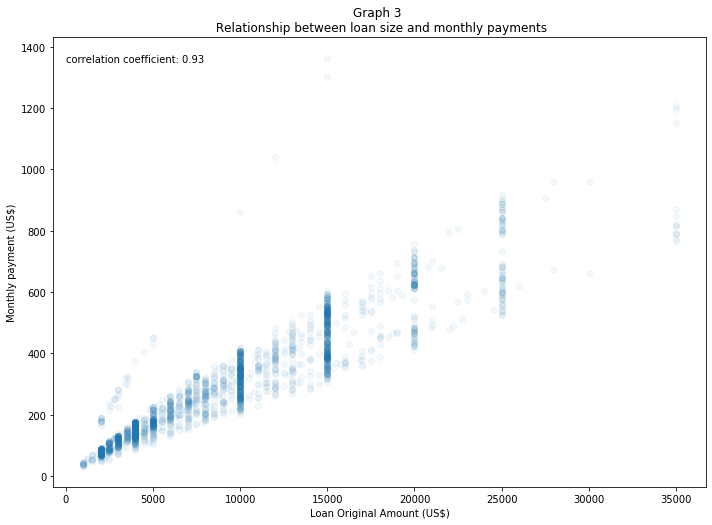

In [58]:
## Sampling to avoid overplotting
df_subset= df.sample(n= 2500, replace= False, random_state=2021)
## correlation
corr= round(df_subset.MonthlyLoanPayment.corr(df_subset.LoanOriginalAmount), 2)
## Scatter plot of LoanOriginalAmount vs MonthlyLoanPayment for current loans
plt.figure(figsize=[11.69, 8.27])
sb.regplot(data= df_subset, y= 'MonthlyLoanPayment', x= 'LoanOriginalAmount',
           fit_reg= False, scatter_kws={'alpha':1/20}, y_jitter= 0.01)
plt.title('Graph 3 \n Relationship between loan size and monthly payments')
plt.ylabel('Monthly payment (US$)')
plt.xlabel('Loan Original Amount (US$)')
plt.text(s= 'correlation coefficient: {}'.format(corr),
         y= 1350, x= 0)
plt.show()

Graph 3 shows a strong linear correlation between these two variables. Furthermore, they seem to cluster into three distinct groups.

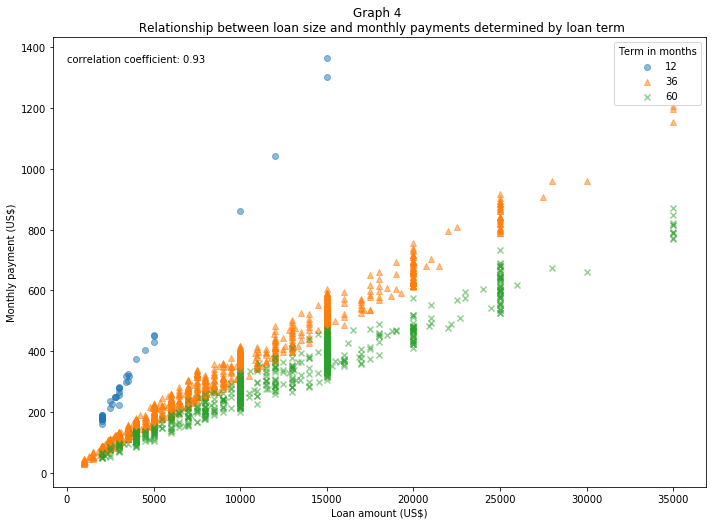

In [68]:
term_markers = [[12, 'o'],
                [36, '^'],
                [60, 'x']]
plt.figure(figsize=[11.69, 8.27])

for term, marker in term_markers:
    sb.regplot(data= df_subset[df_subset['Term'] == term], y= 'MonthlyLoanPayment',
               x= 'LoanOriginalAmount', fit_reg= False, scatter_kws={'alpha':.5}, 
               y_jitter= 0.01, marker= marker)
plt.title('Graph 4 \n Relationship between loan size and monthly payments determined by loan term')
plt.ylabel('Monthly payment (US$)')
plt.xlabel('Loan amount (US$)')
plt.legend(['12', '36', '60'], title= 'Term in months')
plt.text(s= 'correlation coefficient: {}'.format(corr),
         y= 1350, x= 0)
plt.show()

Graph 4 shows that monthly payments of a certain loan size are clearly influenced by the term of said loan.

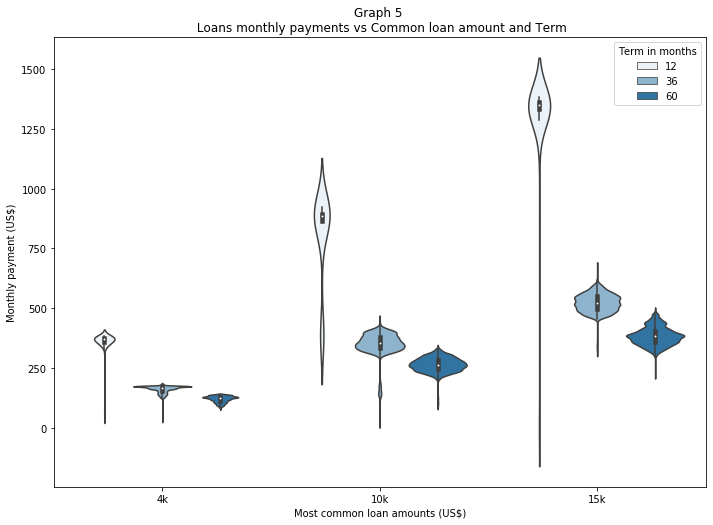

In [69]:
## Plot Loans monthly payments vs Common loan amount and Term
plt.figure(figsize=[11.69, 8.27])
base_color = sb.color_palette()[0]
sb.violinplot(data= df1, x='CommonLoanAmount', y= 'MonthlyLoanPayment',
              hue='Term',
              color=base_color)
plt.xlabel('Most common loan amounts (US$)')
plt.ylabel('Monthly payment (US$)')
plt.legend(title= 'Term in months')
plt.title('Graph 5 \n Loans monthly payments vs Common loan amount and Term')
plt.show()

By looking at the most common loan sizes (\\$4000, \\$10000, \\$15000), graph 5 confirms beyond any doubt that, indeed, there is a clear relationship between loan size, monthly payments and loan term.

## 3. Dangerous combination

* Lower income (below \\$50000 per year), when paired with higher levels of BorrowerAPR (above *0.25*), seem to be related to higher levels of default. Given the insight above, it could be in the best interest of Prosper to develop a reliable model in predicting when this profile of customer would tend to default.

In [61]:
## function to create new 'defaulted' column
def selecter(row):
    if row == 'Completed':
        return row
    elif row == 'Chargedoff':
        return 'Defaulted'
    elif row == 'Defaulted':
        return 'Defaulted'
    else:
        return np.nan
## Filtering for desired LoanStatus
query= "LoanStatus == 'Completed' or LoanStatus == 'Chargedoff' or LoanStatus == 'Defaulted'"
df_status= df.query(query)
## Create new column
df_status['Defaulted']= df_status.LoanStatus.apply(selecter)

/Users/lucasaledi/anaconda3/envs/project2/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [62]:
## Getting proportions
status_income= (df_status.groupby('Defaulted', observed= True)['IncomeRange']
               .value_counts(normalize= True)
               .rename('percentage')
               .mul(100)
               .reset_index())

income_status= (df_status.groupby('IncomeRange', observed= True)['Defaulted']
               .value_counts(normalize= True)
               .rename('percentage')
               .mul(100)
               .reset_index())

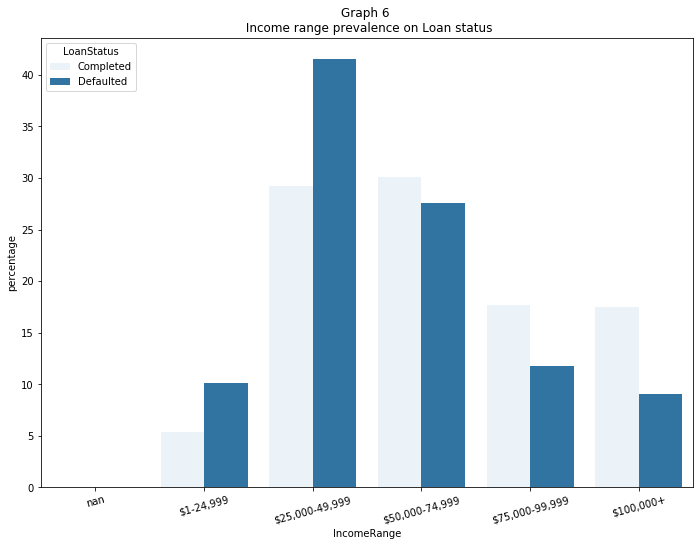

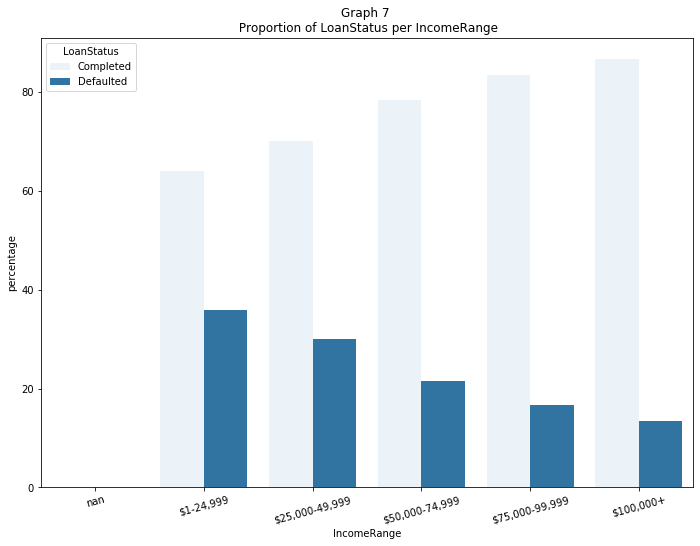

In [70]:
## Loan status vs Income range
plt.figure(figsize=[11.69, 8.27])
base_color = sb.color_palette()[0]
order_plot= [np.nan, '$1-24,999', '$25,000-49,999',
             '$50,000-74,999',  '$75,000-99,999', '$100,000+']
sb.barplot(data= status_income, x='IncomeRange', y= 'percentage',
              hue='Defaulted', color=base_color, order= order_plot)
plt.xticks(rotation=15)
plt.legend(title='LoanStatus', loc= 2)
plt.title('Graph 6 \n Income range prevalence on Loan status')
plt.show()

## Income range vs Loan status
plt.figure(figsize=[11.69, 8.27])
base_color = sb.color_palette()[0]
order_plot= [np.nan, '$1-24,999', '$25,000-49,999',
             '$50,000-74,999',  '$75,000-99,999', '$100,000+']
sb.barplot(data= income_status, x='IncomeRange', y= 'percentage',
              hue='Defaulted', color=base_color, order= order_plot)
plt.xticks(rotation=15)
plt.legend(title='LoanStatus', loc= 2)
plt.title('Graph 7 \n Proportion of LoanStatus per IncomeRange')
plt.show()

Looking at Graphs 6 and 7, we can see that, as the income increases, the percentage of loans being defaulted decreases. This is somewhat expected as people with larger income, in general, would have more means to pay back their loans.

It is also worthy noting that the second tier of income (\\$25000-\\$49999) is the one which contributes the most with defaulted loans. This, however, may be explained by the mere fact that most borrowers fall under this income range. 

Also important to mention that, altough they contribute much less to the absolute number of defaulted loans, the first tier of income (< \\$25000) is the one which, proportionally, defaults the most.

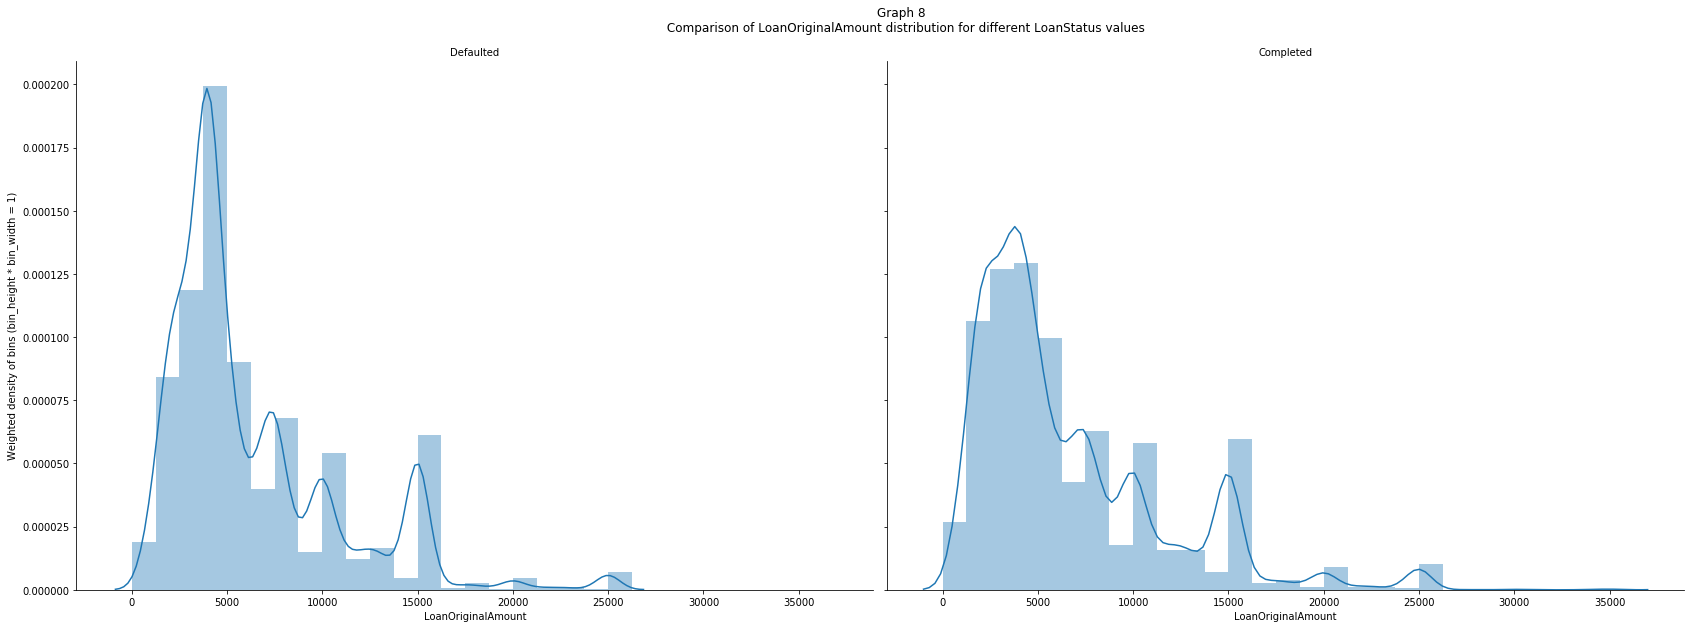

In [81]:
## LoanOriginalAmount vs Defaulted
bin_size=1250
bins_e= np.arange(0, 35000+bin_size, bin_size)
g= sb.FacetGrid(data= df_status, col= 'Defaulted',
                height = 8.27, aspect= 11.69/8.27)
g.map(sb.distplot, 'LoanOriginalAmount', kde= True, norm_hist= True,
      bins= bins_e)
g.set_titles('{col_name}')
g.set_ylabels('Weighted density of bins (bin_height * bin_width = 1)')
plt.suptitle('Graph 8 \n Comparison of LoanOriginalAmount distribution for different LoanStatus values',
            y= 1.05, x=.53)
plt.show()

Loans at around \\$4000 are more likely then any other to be defaulted. This is somewhat counter-intuitive as we were expecting larger loans to do that.

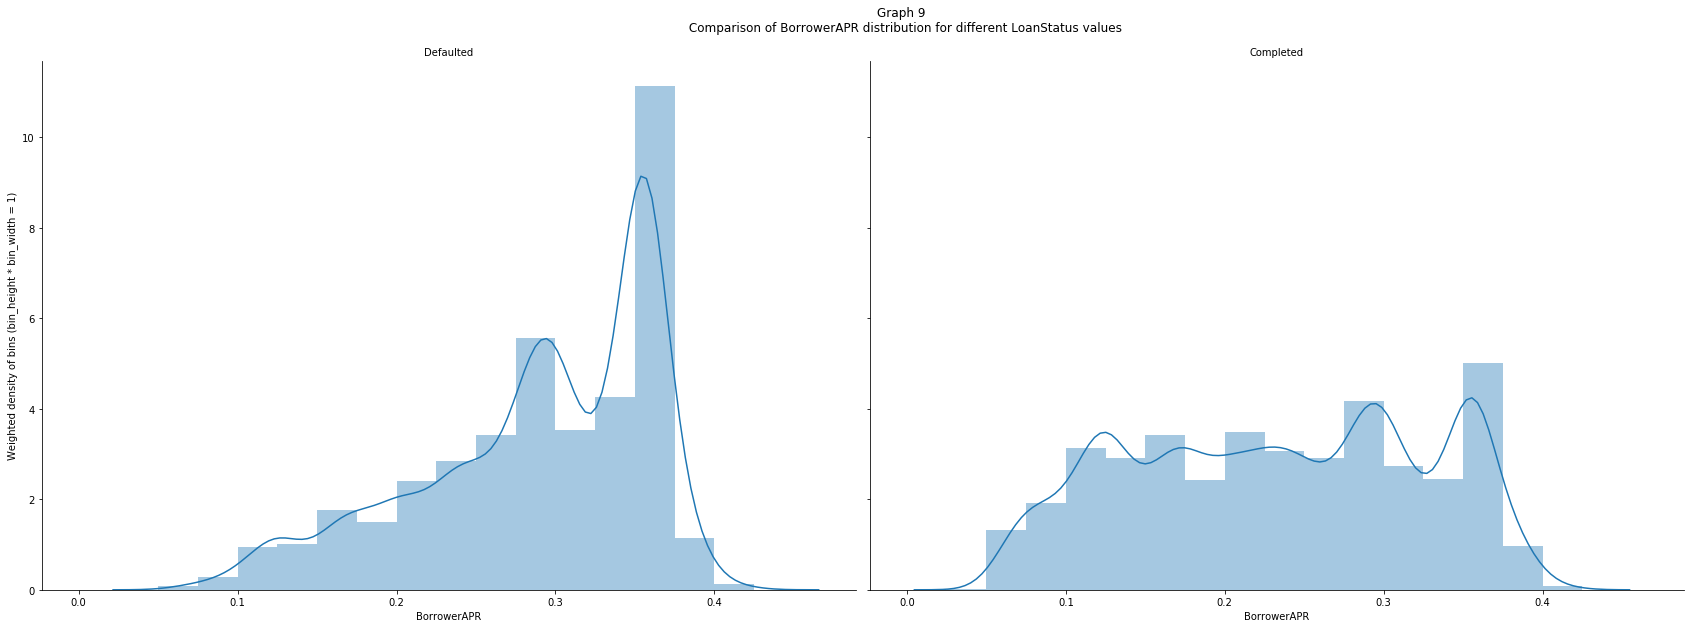

In [83]:
## BorrowerAPR distribution
bin_size= 0.025
bins_e= np.arange(0, 0.45+bin_size, bin_size)
g= sb.FacetGrid(data= df_status, col= 'Defaulted',
                height = 8.27, aspect= 11.69/8.27)
g.map(sb.distplot, 'BorrowerAPR', kde= True, norm_hist= True,
      bins= bins_e) 
g.set_titles('{col_name}')
g.set_ylabels('Weighted density of bins (bin_height * bin_width = 1)')
plt.suptitle('Graph 9 \n Comparison of BorrowerAPR distribution for different LoanStatus values',
             y= 1.05, x=.53)
plt.show()

As expected, graph 9 indicates that, as BorrowerAPR increases, also does the incidence of default.

In [66]:
## Create new df and add default_range column
df_income= df_status.copy()
## function to create new 'defaulted' column on df1_status
default_income= ['$1-24,999','$25,000-49,999']

def selecter(row):
    if row in default_income:
        return '$1-49,999'
    else:
        return 'other'
## apply selecter to create new column on df_income
df_income['default_income']= df_income['IncomeRange'].apply(selecter)

Now, taking into account the insights provided by the LoanOriginalAmount analysis, let's see how they relate to BorrowerAPR and LoanStatus.

Given that we need to visualize the interaction between 4 different variables, being 2 of them numerical *(LoanOriginalAmount and BorrowerAPR)* and the other 2 categorical *(LoanStatus and IncomeRange)*, we've decided to split the visualization into 2 plots: one for Completed loans and the other for Defaulted loans. To further assist the visualization process, we are going to limit plot markers to two groups: 1) income range from \\$25000 up to \\$49999, and 2) all others. 

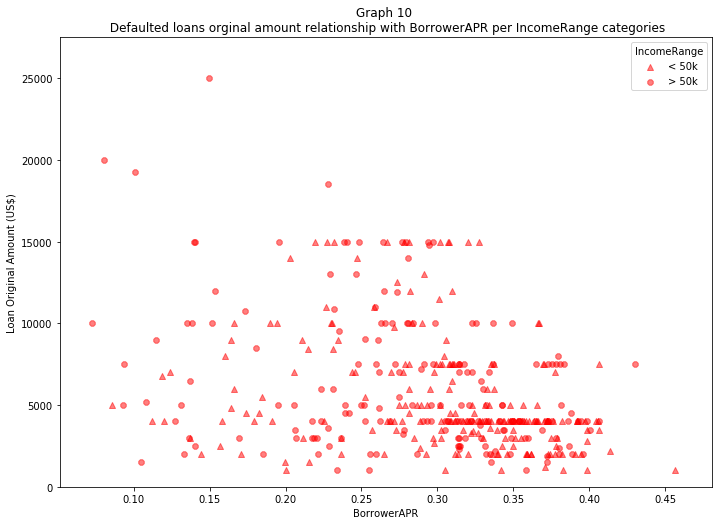

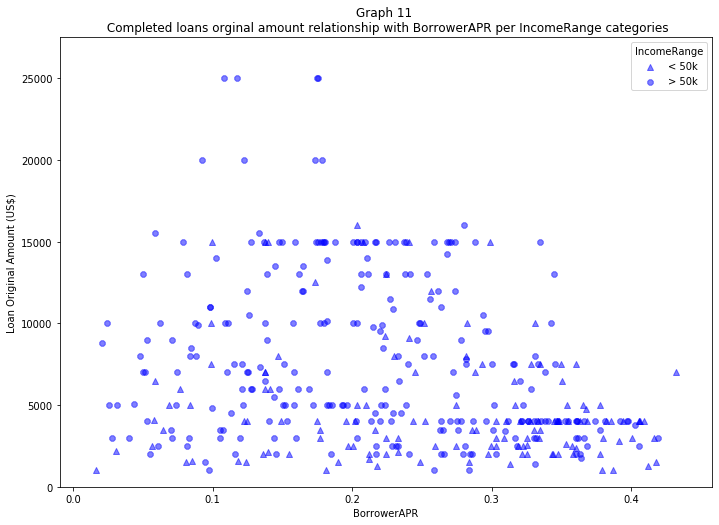

In [84]:
## loans orginal amount vs BorrowerAPR and IncomeRange
income_markers = [['$1-49,999', '^'],
                  ['other', '8']]
status= ['Defaulted', 'Completed']
colors= ['red', 'blue']
numbs= ['10', '11']

for stat, color, numb in zip(status, colors, numbs):
    plt.figure(figsize=[11.69, 8.27])
    for income, marker in income_markers:
        plot_data = (df_income[df_income['Defaulted']== stat]
                     .sample(n= 400, replace= True, random_state= 2021)
                     .loc[df_income['default_income'] == income])
        g= sb.regplot(data= plot_data, x='BorrowerAPR', y='LoanOriginalAmount', fit_reg= False,
                     marker= marker, color= color, scatter_kws={'alpha':.5},
                     x_jitter=.05, y_jitter=.05)
        plt.legend(['< 50k', '> 50k'], title= 'IncomeRange')
        plt.ylim(0, 27500)
        plt.xlabel('BorrowerAPR')
        plt.ylabel('Loan Original Amount (US$)')
        plt.title('Graph {} \n {} loans orginal amount relationship with BorrowerAPR per IncomeRange categories'.format(numb, stat))
    plt.show()

Lower income (below \\$50000 per year), when paired with higher levels of BorrowerAPR (above *0.25*), seem to be related to higher levels of default. That is particularly acute for smaller loans (around \\$4000) which make up the vast majority of loans issued by Prosper.

# The End...



##### for now